In [3]:
# import pandas, matplotlib, seaborn, numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for plots
sns.set_style("whitegrid")

# Enable plots to show inline in Jupyter Notebook
%matplotlib inline

In [4]:
# Load the dataset into a pandas dataframe
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

Exploration of the Dataset

In [6]:
#Preview of the first few rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Dataframe shape
airbnb_df.shape

(48895, 16)

In [8]:
# Dataframe column names and types
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Basic Stats for numeric columns
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
# Check for missing values
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# Investigate missing values
missing = airbnb_df.isnull().sum()

# Make a percentage of missing values
missing_percent = (missing / len(airbnb_df)) * 100

# Dataframe for missing values
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})

# Filter dataframe for missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

# Sort columns for highest missing values
missing_df.sort_values(by='Missing %', ascending=False)

,Missing Count,Missing %
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723


Handle missing values of the 4 columns

In [14]:
# Fill missing reviews with placeholders
airbnb_df['last_review'] = airbnb_df['last_review'].fillna('No reviews')

In [15]:
# Fill missing reviews per month with placeholders
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [16]:
# Replace missing host names with 'Unknown'
airbnb_df['host_name'] = airbnb_df['host_name'].fillna('Unkown')

In [17]:
# Drop rows with missing name since information is important
airbnb_df = airbnb_df.dropna(subset=['name'])

In [18]:
# Verify there are no more missing values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Explore column datatypes, set id to be the index

In [19]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   host_name                       48879 non-null  object 
 4   neighbourhood_group             48879 non-null  object 
 5   neighbourhood                   48879 non-null  object 
 6   latitude                        48879 non-null  float64
 7   longitude                       48879 non-null  float64
 8   room_type                       48879 non-null  object 
 9   price                           48879 non-null  int64  
 10  minimum_nights                  48879 non-null  int64  
 11  number_of_reviews               48879 non-null  int64  
 12  last_review                     

In [20]:
airbnb_df.set_index('id', inplace=True)

In [21]:
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No reviews,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Convert Column Data Types


In [23]:
# Change id and host id column to string 
# Identifiers and math will not be performed on them
airbnb_df.index = airbnb_df.index.astype(str)
airbnb_df['host_id'] = airbnb_df['host_id'].astype(str)

In [24]:
# Change the host_name to string
airbnb_df['host_name'] = airbnb_df['host_name'].astype(str)

In [25]:
# Change neighbourhood_group, neighbourhood and room type
# to category datatype
# Saves memory and improves group operations
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].astype('category')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype('category')
airbnb_df['room_type'] = airbnb_df['room_type'].astype('category')

In [26]:
# Lastly, change last_review to datetime
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

In [27]:
# Check all column datatypes
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48879 non-null  object        
 1   host_id                         48879 non-null  object        
 2   host_name                       48879 non-null  object        
 3   neighbourhood_group             48879 non-null  category      
 4   neighbourhood                   48879 non-null  category      
 5   latitude                        48879 non-null  float64       
 6   longitude                       48879 non-null  float64       
 7   room_type                       48879 non-null  category      
 8   price                           48879 non-null  int64         
 9   minimum_nights                  48879 non-null  int64         
 10  number_of_reviews               48879 non-null  int64         
 11  l

In [28]:
# Check for duplicate rows
airbnb_df.duplicated().sum()

0

In [29]:
# Check for duplicate ids
airbnb_df.index.duplicated().sum()

0

Do a 'Sanity Check' to make sure nothing weird slips by before analysis

In [31]:
# Do an in-depth describe 
airbnb_df.describe(include='all')

/var/folders/20/42s_047j5kv430pdth61krl40000gn/T/ipykernel_25649/798117228.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  airbnb_df.describe(include='all')


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48879,48879,48879,48879,48879,48879.000000,48879.000000,48879,48879.000000,48879.000000,48879.000000,38837,48879.000000,48879.000000,48879.000000
unique,47905,37443,11451,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,Hillside Hotel,219517861,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN
freq,18,327,417,21652,3918,NaN,NaN,25402,NaN,NaN,NaN,1413,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,40.728945,-73.952168,NaN,152.722355,7.011027,23.281205,NaN,1.091248,7.145891,112.788989
std,NaN,NaN,NaN,NaN,NaN,0.054529,0.046160,NaN,240.186804,20.016000,44.556149,NaN,1.597433,32.957738,131.613322
min,NaN,NaN,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,40.690090,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000


In [36]:
# Check unique values of neighbourhood group
print(airbnb_df['neighbourhood_group'].unique())
# Make sure values are normalized
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].str.strip()

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [37]:
# Check unique values for neighbourhood
print(airbnb_df['neighbourhood'].unique())
# Normalize all values
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].str.strip()

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']


In [38]:
# Check unique values for room_type
print(airbnb_df['room_type'].unique())
# Normalize all values
airbnb_df['room_type'] = airbnb_df['room_type'].str.strip()

['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']


Now that we have a nice, clean dataset,
Lets begin exploring and visualizing the data

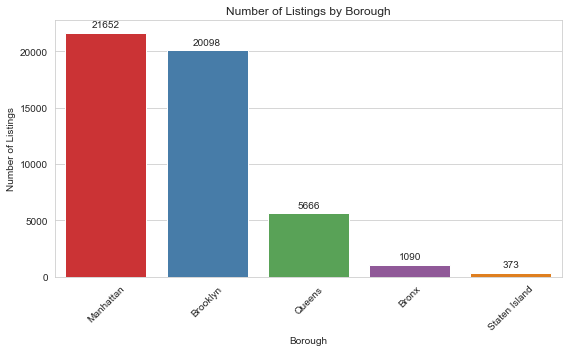

In [64]:
# Visualize the number of listings per bourough (neighbourhood_groups)
plt.figure(figsize=(8,5))
# Plot bars by neighbourhood_group, order the bars by value counts, use palette for better contrast
ax = sns.countplot(data=airbnb_df, x='neighbourhood_group',
              order=airbnb_df['neighbourhood_group'].value_counts().index, 
                  palette='Set1') #hue='neighbourhood_group'
plt.title('Number of Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.tight_layout()
plt.show()

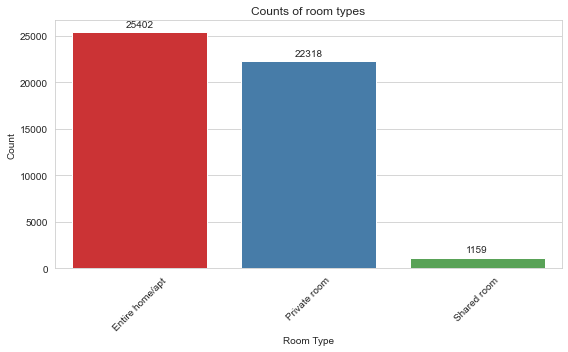

In [57]:
# Plot the number of listings by room_type
plt.figure(figsize=(8,5))
ax = sns.countplot(data=airbnb_df, x='room_type', 
              order=airbnb_df['room_type'].value_counts().index,
                  palette='Set1')
plt.title('Counts of room types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

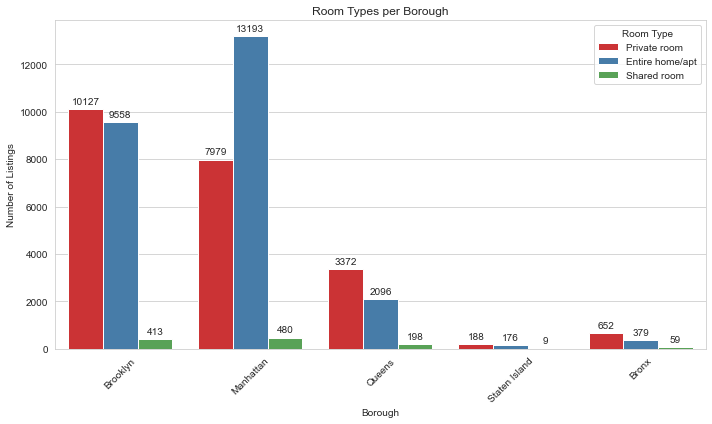

In [69]:
# Visualize the room types per borough
plt.figure(figsize=(10,6))
ax = sns.countplot(
data=airbnb_df,
x='neighbourhood_group',
hue='room_type',
palette='Set1')
plt.title('Room Types per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

Begin visualization of Prices and how they compare with room types, different boroughs, etc.